In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [85]:
xls = pd.ExcelFile('Case_study_data.xlsx')
df_churned=pd.read_excel(xls,sheet_name=1)
df_active=pd.read_excel(xls,sheet_name=0)

In [86]:
df_churned.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,2002-01-18,2006-04-02,2004-01-03,Professional,DW6000,NaN,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,NaN,N
1,AMR-53383136,Closed,2002-01-02,2006-07-09,2004-07-28,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,NaN,National Sales,NaN,22-10-1965,47.0,5,0,0.0,Y
2,AMR-53608585,Closed,2002-01-06,2008-12-30,2005-04-27,NaN,DW6000,Retail/Others,Indirect,TAG,...,Broadband Remote,NaN,Direct,2.0,20-3-1951,61.0,8,1,0.0,Y
3,AMR-53610590,Closed,2002-01-05,2004-08-19,NaT,SO,DW4000,NaN,Indirect,TAG,...,Broadband Remote,NaN,Direct,1.0,27-3-1948,64.0,0,.,NaN,Y
4,AMR-53612154,Closed,2002-01-05,2006-08-17,2005-11-12,Professional,DW7000,Retail/Others,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,1.0,25-8-1956,56.0,6,0,0.0,N


In [87]:
df_active.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2001-11-27,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,2.0,1-5-1943,69,0,1.0,0.0,N
1,AMR-14837287,Active,2003-05-02,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,...,Spaceway,0,Retail,2.0,28-12-1969,43,4,1.0,0.0,N
2,AMR-14837803,Active,2001-01-28,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,...,Broadband Remote,0,National Sales,2.0,20-7-1954,58,4,1.0,0.0,N
3,AMR-14837821,Active,2001-11-20,2005-03-27,Power150,DW6000,Sales Agents,Direct,NaN,HNS Customers,...,Spaceway,0,Direct,NaN,10-5-1990,22,6,1.0,1.0,NaN
4,AMR-14839297,Active,2002-02-27,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,HNS Customers,...,Broadband Remote,0,DW6000 Upgrade,1.0,11-5-1976,36,7,0.0,0.0,NaN


In [88]:
#Dropping columns not needed in the training set

In [89]:
df_active.drop(['FIRST_COMMUNICATION_DATE','DATE_OF_BIRTH','EMAIL_ADDRESS','ADDRESS','FIRST_NAME','LAST_NAME'],axis=1,inplace=True)

In [90]:
df_churned.drop(['FIRST_COMMUNICATION_DATE','DATE_OF_BIRTH','CHURN_DATE','ADDRESS','FIRST_NAME','LAST_NAME'],axis=1,inplace=True)

In [91]:
df_active.drop(['ZIPCODE','STATE'],axis=1,inplace=True)

In [92]:
df_active.drop(['CITY'],axis=1,inplace=True)

In [93]:
df_churned.drop(['ZIPCODE','STATE'],axis=1,inplace=True)

In [94]:
df_churned.drop(['EMAIL_ADDRESS','CITY'],axis=1,inplace=True)

In [95]:
total = df_churned.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((df_churned.isnull().sum(axis=0)/df_churned.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
COMPUTER_OWNER,3243,32.43
SALES_CHANNEL,2602,26.02
FEEDBACK,2028,20.28
SERVICE_PLAN,1482,14.82
PRESENCE_OF_CHILDREN,1252,12.52
GENDER,1238,12.38
SATELLITE,1013,10.13
UPGRADE_DATE,879,8.79
DIRECT_INDIRECT_CHANNEL,784,7.84
MODEL,710,7.10


In [96]:
total = df_active.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((df_active.isnull().sum(axis=0)/df_active.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
COMPUTER_OWNER,3055,30.553055
SALES_CHANNEL,2906,29.062906
FEEDBACK,1914,19.141914
PRESENCE_OF_CHILDREN,1315,13.151315
GENDER,1271,12.711271
SERVICE_ PLAN,1239,12.391239
WARRANTY_NAME,957,9.570957
SALES_SOURCE,693,6.930693
MODEL,676,6.760676
SATELLITE,396,3.960396


In [97]:
df_active.head(10)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,FEEDBACK,SATELLITE,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,NaN,SPACEWAY3,Broadband Remote,0,HN7000 Upgrade,2.0,69,0,1.0,0.0,N
1,AMR-14837287,Active,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,GOOD,HZN2-VER-4K,Spaceway,0,Retail,2.0,43,4,1.0,0.0,N
2,AMR-14837803,Active,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,BAD,SM5-VER-15K,Broadband Remote,0,National Sales,2.0,58,4,1.0,0.0,N
3,AMR-14837821,Active,2005-03-27,Power150,DW6000,Sales Agents,Direct,NaN,HNS Customers,NaN,SPACEWAY3,Spaceway,0,Direct,NaN,22,6,1.0,1.0,NaN
4,AMR-14839297,Active,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,HNS Customers,GOOD,0,Broadband Remote,0,DW6000 Upgrade,1.0,36,7,0.0,0.0,NaN
5,AMR-14840229,Active,2005-07-13,Pro,HN9000,Sales Agents,Indirect,UNKNOWN,HNS Customers,GOOD,SPACEWAY3,Broadband Remote,0,HN9000 Upgrade,2.0,51,7,1.0,0.0,NaN
6,AMR-14841940,Active,2003-06-05,Power150,HN7000S,NaN,Indirect,ValueElectronics,HNS Customers,NaN,G17-HOR-2K,Broadband Remote,0,Retail,1.0,56,3,1.0,0.0,NaN
7,AMR-14842501,Active,2004-01-25,Power150,HN7000S,Vars,Indirect,TAG,HNS Customers,GOOD,SM5-VER-5K,Broadband Remote,0,Retail,1.0,57,7,0.0,NaN,Y
8,AMR-14847927,Active,2006-02-23,Home,DW6000,Vars,Indirect,NaN,HNS Customers,GOOD,AM6-HOR-21K,Broadband Remote,0,HN9000 Upgrade,2.0,42,4,2.0,0.0,NaN
9,AMR-14859335,Active,2004-09-06,Basic_Ltd,HN7000S,Sales Agents,Indirect,Hughes Web Order,HNS Customers,BAD,G17-HOR-6K,Broadband Remote,0,HN7000 Upgrade,2.0,34,4,2.0,1.0,N


In [98]:
#Imputing missing categorical values with mode.

In [99]:
df_active['COMPUTER_OWNER'] = df_active['COMPUTER_OWNER'].fillna(df_active['COMPUTER_OWNER'].mode()[0])

In [100]:
df_active['SALES_CHANNEL'] = df_active['SALES_CHANNEL'].fillna(df_active['SALES_CHANNEL'].mode()[0])

In [101]:
df_active['FEEDBACK']=df_active['FEEDBACK'].fillna(df_active['FEEDBACK'].mode()[0])

In [102]:
df_active['PRESENCE_OF_CHILDREN']=df_active['PRESENCE_OF_CHILDREN'].fillna(df_active['PRESENCE_OF_CHILDREN'].mode()[0])

In [103]:
df_active['GENDER']=df_active['GENDER'].fillna(df_active['GENDER'].mode()[0])

In [104]:
df_active['SERVICE_ PLAN']=df_active['SERVICE_ PLAN'].fillna(df_active['SERVICE_ PLAN'].mode()[0])

In [105]:
df_active['WARRANTY_NAME']=df_active['WARRANTY_NAME'].fillna(df_active['WARRANTY_NAME'].mode()[0])

In [106]:
df_active['MODEL']=df_active['MODEL'].fillna(df_active['MODEL'].mode()[0])

In [107]:
df_active['SALES_SOURCE']=df_active['SALES_SOURCE'].fillna(df_active['SALES_SOURCE'].mode()[0])

In [108]:
df_active['MARITAL_STATUS']=df_active['MARITAL_STATUS'].fillna(df_active['MARITAL_STATUS'].mode()[0])

In [109]:
df_active['INCOME']=df_active['INCOME'].fillna(df_active['INCOME'].mode()[0])

In [110]:
df_active['SATELLITE']=df_active['SATELLITE'].fillna(df_active['SATELLITE'].mode()[0])

In [111]:
df_active.rename(columns={'SERVICE_ PLAN':'SERVICE_PLAN'},inplace=True)

#remove missing values from churned data as well
#create dummy variables for categorical data.

In [112]:
df_churned['COMPUTER_OWNER']=df_churned['COMPUTER_OWNER'].fillna(df_churned['COMPUTER_OWNER'].mode()[0])

In [113]:
df_churned['SALES_CHANNEL']=df_churned['SALES_CHANNEL'].fillna(df_churned['SALES_CHANNEL'].mode()[0])

In [114]:
df_churned['FEEDBACK']=df_churned['FEEDBACK'].fillna(df_churned['FEEDBACK'].mode()[0])

In [115]:
df_churned['PRESENCE_OF_CHILDREN']=df_churned['PRESENCE_OF_CHILDREN'].fillna(df_churned['PRESENCE_OF_CHILDREN'].mode()[0])

In [116]:
df_churned['GENDER']=df_churned['GENDER'].fillna(df_churned['GENDER'].mode()[0])

In [117]:
df_churned['SERVICE_PLAN']=df_churned['SERVICE_PLAN'].fillna(df_churned['SERVICE_PLAN'].mode()[0])

In [118]:
df_churned['WARRANTY_NAME']=df_churned['WARRANTY_NAME'].fillna(df_churned['WARRANTY_NAME'].mode()[0])

In [119]:
df_churned['MODEL']=df_churned['MODEL'].fillna(df_churned['MODEL'].mode()[0])

In [120]:
df_churned['SALES_SOURCE']=df_churned['SALES_SOURCE'].fillna(df_churned['SALES_SOURCE'].mode()[0])

In [121]:
df_churned['SATELLITE']=df_churned['SATELLITE'].fillna(df_churned['SATELLITE'].mode()[0])

In [122]:
df_churned['SALES_SOURCE']=df_churned['SALES_SOURCE'].fillna(df_churned['SALES_SOURCE'].mode()[0])

In [123]:
df_churned['DIRECT_INDIRECT_CHANNEL']=df_churned['DIRECT_INDIRECT_CHANNEL'].fillna(df_churned['DIRECT_INDIRECT_CHANNEL'].mode()[0])

In [124]:
df_churned['MARITAL_STATUS']=df_churned['MARITAL_STATUS'].fillna(df_churned['MARITAL_STATUS'].mode()[0])

In [125]:
ind_data=df_active.copy()

In [126]:
ind_data.index=ind_data['SITE_ACCOUNT_NUMBER']

In [127]:
ind_data.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'UPGRADE_DATE', 'SERVICE_PLAN',
       'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE',
       'COMPANY_SOURCE_NAME', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER'],
      dtype='object')

In [128]:
df_churned.index=df_churned['SITE_ACCOUNT_NUMBER']

In [129]:
ind_data=pd.concat([ind_data,df_churned])

In [130]:
temp=ind_data[ind_data['UPGRADE_DATE'].isnull()==False] #Tranforming upgrade date into whether the customer was upgraded or not.

In [131]:
temp1=ind_data[ind_data['UPGRADE_DATE'].isnull()]

In [132]:
temp['UPGRADE_DATE']=1

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
temp1['UPGRADE_DATE']=0

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
ind_data=pd.concat([temp,temp1])

In [135]:
ind_data.rename(columns={'UPGRADE_DATE':'UPGRADE_STATUS'},inplace=True)

In [136]:
temp=ind_data[(ind_data['INCOME']=='A')].replace('A',11)
ind_data.update(temp)
temp1=ind_data[(ind_data['INCOME']=='B')].replace('B',12)
ind_data.update(temp1)
temp2=ind_data[(ind_data['INCOME']=='C')].replace('C',13)
ind_data.update(temp2)
temp3=ind_data[(ind_data['INCOME']=='D')].replace('D',14)
ind_data.update(temp3)
temp4=ind_data[(ind_data['INCOME']=='E')].replace('E',15)
ind_data.update(temp4)

In [137]:
total = ind_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((ind_data.isnull().sum(axis=0)/ind_data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
SITE_TYPE_DESC,74,0.370019
DIRECT_INDIRECT_CHANNEL,45,0.225011
MOST_RECENT_SALES_CHANNEL,28,0.140007
COMPANY_SOURCE_NAME,19,0.095005
ACCOUNT_STATUS,16,0.080004
AGE,9,0.045002
SITE_ACCOUNT_NUMBER,1,0.005000
SALES_SOURCE,0,0.000000
UPGRADE_STATUS,0,0.000000
SERVICE_PLAN,0,0.000000


In [138]:
df_copy = ind_data.copy().dropna(how='any')
df_copy.shape

(19819, 20)

In [139]:
temp5=df_copy[(df_copy['MARITAL_STATUS']=='.')].replace('.',0.0)
df_copy.update(temp5)

In [140]:
total = df_copy.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((df_copy.isnull().sum(axis=0)/df_copy.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
COMPUTER_OWNER,0,0.0
PRESENCE_OF_CHILDREN,0,0.0
ACCOUNT_STATUS,0,0.0
UPGRADE_STATUS,0,0.0
SERVICE_PLAN,0,0.0
MODEL,0,0.0
SALES_CHANNEL,0,0.0
DIRECT_INDIRECT_CHANNEL,0,0.0
SALES_SOURCE,0,0.0
COMPANY_SOURCE_NAME,0,0.0


In [141]:
df_copy.drop(['SALES_SOURCE','COMPANY_SOURCE_NAME','SATELLITE','MOST_RECENT_SALES_CHANNEL'],axis=1,inplace=True) 

In [142]:
dep_data=df_copy['ACCOUNT_STATUS'].copy() #Extracting our dependent variable

In [143]:
curr_val=pd.get_dummies(df_copy['COMPUTER_OWNER'],prefix='COMPUTER_OWNER')
df_copy=df_copy.join(curr_val)

In [144]:
curr_val=pd.get_dummies(df_copy['ACCOUNT_STATUS'],prefix='ACCOUNT_STATUS')
df_copy=df_copy.join(curr_val)

In [145]:
curr_val=pd.get_dummies(df_copy['SERVICE_PLAN'],prefix='SERVICE_PLAN')
df_copy=df_copy.join(curr_val)

In [146]:
curr_val=pd.get_dummies(df_copy['MODEL'],prefix='MODEL')
df_copy=df_copy.join(curr_val)

In [147]:
curr_val=pd.get_dummies(df_copy['SALES_CHANNEL'],prefix='SALES_CHANNEL')
df_copy=df_copy.join(curr_val)

In [148]:
curr_val=pd.get_dummies(df_copy['DIRECT_INDIRECT_CHANNEL'],prefix='DIRECT_INDIRECT_CHANNEL')
df_copy=df_copy.join(curr_val)

In [149]:
curr_val=pd.get_dummies(df_copy['SITE_TYPE_DESC'],prefix='SITE_TYPE_DESC')
df_copy=df_copy.join(curr_val)

In [150]:
curr_val=pd.get_dummies(df_copy['WARRANTY_NAME'],prefix='WARRANTY_NAME')
df_copy=df_copy.join(curr_val)

In [151]:
curr_val=pd.get_dummies(df_copy['FEEDBACK'],prefix='FEEDBACK')

In [152]:
df_copy=df_copy.join(curr_val)
df_copy.drop('FEEDBACK',axis=1,inplace=True)

In [153]:
df_copy.drop(['COMPUTER_OWNER','ACCOUNT_STATUS','SERVICE_PLAN','MODEL','SALES_CHANNEL','DIRECT_INDIRECT_CHANNEL','SITE_TYPE_DESC','WARRANTY_NAME'],axis=1,inplace=True)

In [56]:
dep_data=ind_data['ACCOUNT_STATUS']

In [66]:
for col in df_copy.columns:
    print(df_copy[col].value_counts())

AMR-25378926    1
DSS9261090      1
AMR-26062065    1
DSS9385626      1
AMR-16935938    1
Q-94212825      1
AMR-19095174    1
AMR-35983503    1
AMR-93115552    1
AMR-28287962    1
AMR-21940436    1
AMR-45565747    1
DSS-91003403    1
AMR-92843429    1
AMR-49200691    1
AMR-92174692    1
AMR-47543078    1
AMR-43812346    1
AMR-16571462    1
AMR-48515234    1
AMR-15707130    1
AMR-17271676    1
AMR-35575341    1
AMR-93551262    1
DSS8876931      1
AMR-35564759    1
AMR-49219951    1
AMR-90806760    1
AMR-24383175    1
AMR-93702937    1
               ..
AMR-42472509    1
AMR-93170677    1
AMR-41804138    1
AMR-92998314    1
DTV-91346164    1
AMR-90515810    1
Q-90978920      1
AMR-23538309    1
AMR-92339221    1
DTV-90890672    1
AMR-44077279    1
AMR-30233772    1
AMR-94648194    1
AMR-93912607    1
AMR-94419081    1
AMR-92046813    1
AMR-20440282    1
AMR-49520779    1
AMR-93428111    1
AMR-36247245    1
AMR-36599896    1
Q-91023174      1
AMR-36403785    1
AMR-93087646    1
AMR-328801

## Feature Selection Phase

### Applying Chi-square test of independence on the independent and dependent variables.

In [55]:
import scipy.stats as sp
def compute_freq_chi2(x,y):
    """This function will compute frequency table of x an y
    Pandas Series, and use the table to feed for the contigency table
    
    Parameters:
    -------
    x,y : Pandas Series, must be same shape for frequency table
    
    Return:
    -------
    None. But prints out frequency table, chi2 test statistic, and 
    p-value
    """
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

In [56]:
ind_data.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'UPGRADE_STATUS',
       'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'SALES_SOURCE', 'COMPANY_SOURCE_NAME', 'FEEDBACK', 'SATELLITE',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL',
       'GENDER', 'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [71]:
compute_freq_chi2(ind_data['SERVICE_PLAN'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS     Active  Closed  Inactive
SERVICE_PLAN                               
Basic                1260     622         3
Basic_Ltd            1265     665         3
Elite                1254    3269         2
Home                 1240    1121         3
Power15                 0     623         0
Power150             1248       0         0
Pro                  1210     555         0
Professional            0     779         0
Professional Plus       0     505         0
Proplus              2508     663         2
SO                      0    1183         0
ChiSquare test statistic:  6974.520482316528
p-value:  0.0


In [58]:
compute_freq_chi2(ind_data['UPGRADE_STATUS'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
UPGRADE_STATUS                          
0                    9     879         0
1                 9976    9106        13
ChiSquare test statistic:  893.1891367380576
p-value:  1.1128671152020977e-194


In [66]:
compute_freq_chi2(ind_data['SALES_CHANNEL'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
SALES_CHANNEL                           
Call Center       1381       0         1
Call Centers         0    4265         0
Retail/Others        0    1576         0
Retail/others     1439       0         6
Sales Agents      4355    1369         4
Vars              1421    1357         0
Web Orders           0    1418         0
Web orders        1389       0         2
ChiSquare test statistic:  13060.720260857575
p-value:  0.0


In [68]:
compute_freq_chi2(ind_data['DIRECT_INDIRECT_CHANNEL'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS           Active  Closed  Inactive
DIRECT_INDIRECT_CHANNEL                          
0                             9       0         0
Direct                     2316    2800         3
Indirect                   7616    7185        10
ChiSquare test statistic:  67.30332767978011
p-value:  8.413799915848283e-14


In [58]:
compute_freq_chi2(ind_data['MODEL'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
MODEL                                   
DW4000             645    1617         0
DW4020             648       0         7
DW6000             514    1378         0
DW7000             250    1498         1
HN7000S           4967    1897         4
HN9000            1984    3552         1
UNK                977      43         0
ChiSquare test statistic:  5125.459513313986
p-value:  0.0


In [69]:
compute_freq_chi2(ind_data['FEEDBACK'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
FEEDBACK                                
BAD               3048    7072         5
GOOD              6937    2913         8
ChiSquare test statistic:  3244.7348405455373
p-value:  0.0


In [96]:
compute_freq_chi2(ind_data['INCOME'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
INCOME                                  
0.0               3048    2324         3
1.0                156     227         0
2.0                169     381         0
3.0                668    1440         1
4.0                960    1170         3
5.0                875    1173         1
6.0               1545    1101         0
7.0               1014     421         1
8.0                595     376         2
9.0                462     234         2
11.0               193     550         0
12.0                43     138         0
13.0                99     179         0
14.0               158     271         0
ChiSquare test statistic:  1270.902424687663
p-value:  9.81659609457288e-252


In [99]:
compute_freq_chi2(ind_data['GENDER'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
GENDER                                  
1.0               6027    6209         8
2.0               3958    3776         5
ChiSquare test statistic:  6.990400977490026
p-value:  0.030342664464039826


In [101]:
compute_freq_chi2(ind_data['COMPUTER_OWNER'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
COMPUTER_OWNER                          
N                 8863    2820        10
Y                 1122    7165         3
ChiSquare test statistic:  7534.816831792754
p-value:  0.0


In [103]:
compute_freq_chi2(ind_data['PRESENCE_OF_CHILDREN'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS        Active  Closed  Inactive
PRESENCE_OF_CHILDREN                          
0.0                     7945    6661        12
1.0                     2040    3324         1
ChiSquare test statistic:  422.7848724237445
p-value:  1.5611025642641377e-92


### Predictive Modelling Phase

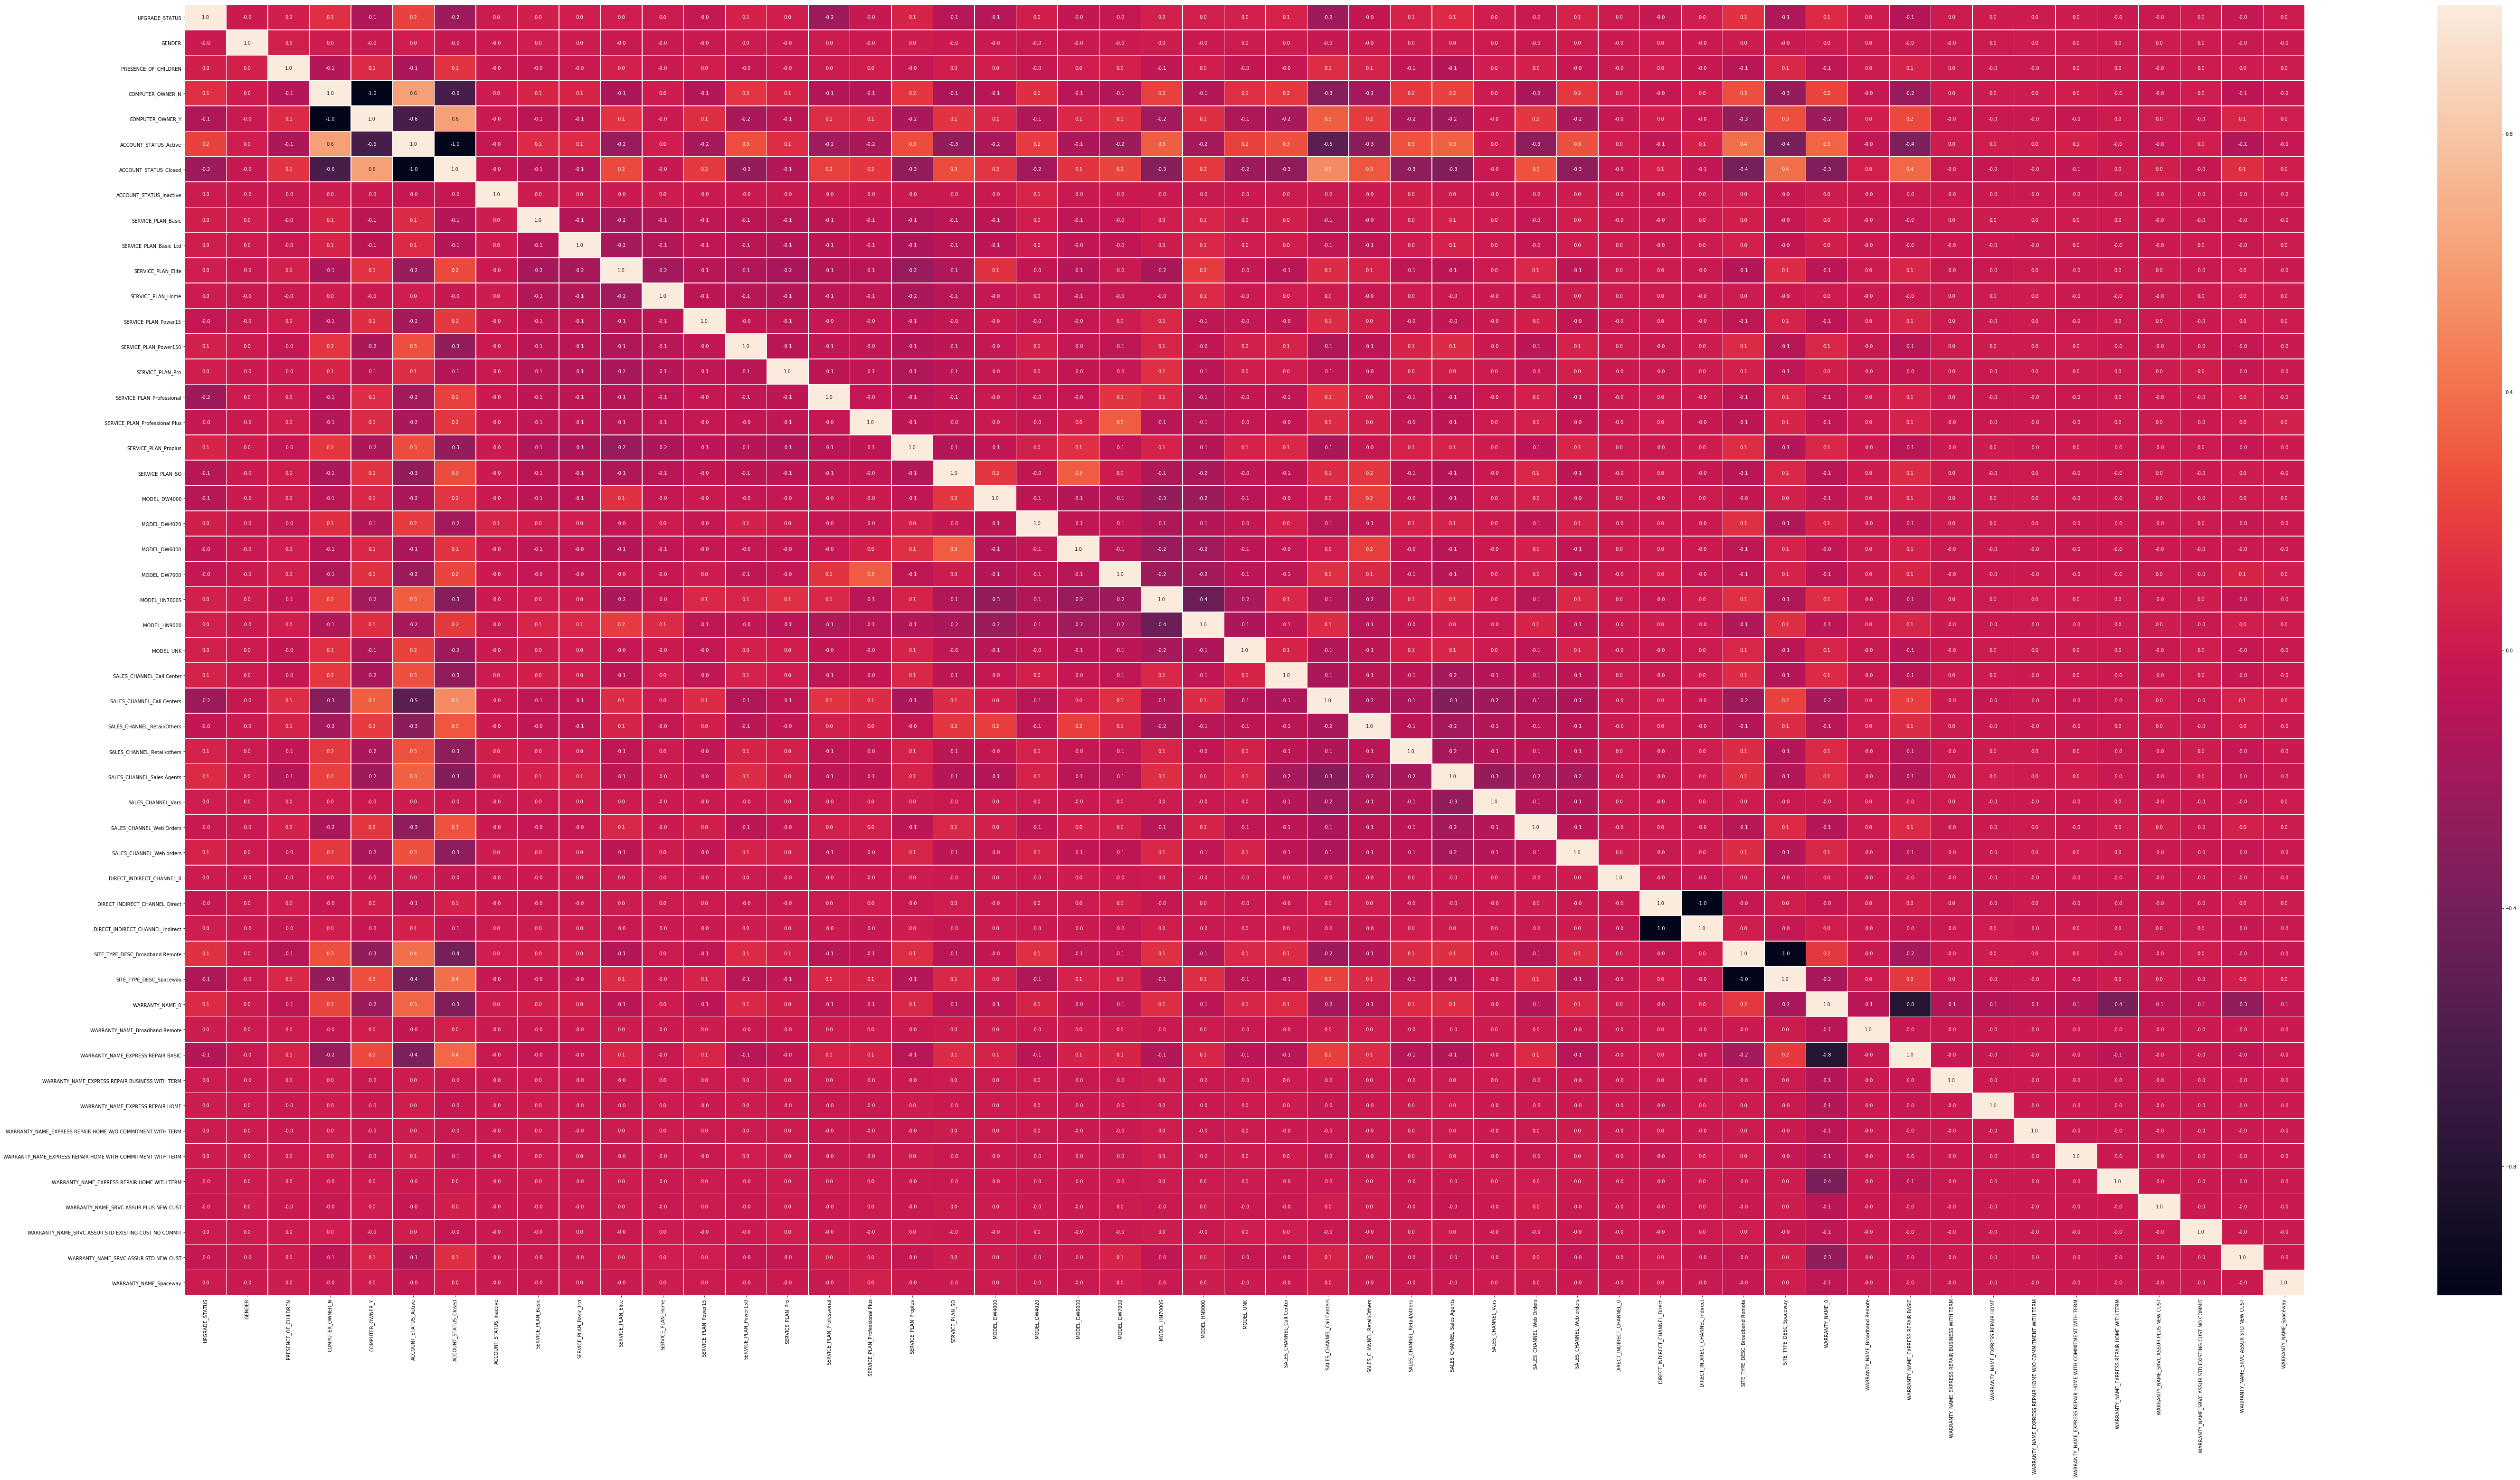

In [79]:
f,ax = plt.subplots(figsize=(100,50))
sns.heatmap(df_copy.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [161]:
df_copy.drop('SITE_ACCOUNT_NUMBER',axis=1,inplace=True)

In [160]:
temp6=dep_data.replace('Active',1)
dep_data.update(temp6)
temp7=dep_data.replace('Inactive',2)
dep_data.update(temp7)
temp8=dep_data.replace('Closed',0)
dep_data.update(temp8)
temp9=df_copy.replace('.',0)
df_copy.update(temp9)

In [162]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_copy,dep_data,test_size=0.2,random_state=0)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [176]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
y_pred=logreg.predict(X_test)

In [177]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [179]:
y_pred=pd.DataFrame(data=y_pred,index=X_test.index)
from sklearn import metrics
cm = metrics.confusion_matrix( y_test,y_pred , [1,0] )

In [180]:
cm

array([[1969,    0],
       [   0, 1993]], dtype=int64)

Text(0.5,15,'Predicted label')

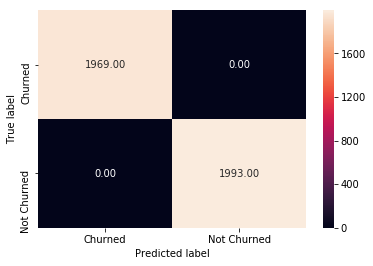

In [181]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Churned", "Not Churned"] , yticklabels = ["Churned", "Not Churned"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [182]:
metrics.accuracy_score( y_test, y_pred )

0.9997477295660948